**<h1><font size=6>Stock Price Prediction Model</font></h1>**
<h1><font size=5>Artificial Intelligence and Machine Learning</font></h1>

<center><img src="https://www.nasdaq.com/sites/acquia.prod/files/image/29525db076bcc42505a356e55dbe94f38b28530b_getty-stock-market-data.jpg" width="50%" height="50%" align="left"></center>

# **Objective**

To build a predictive model for the future prices of stocks for a specified company using historical data. This project will allow users to specify the company that we want to look into by using a variable, so that we can use this model to any company. This model will use Yahoo Finance for the historical stock data and the dataset will include open, high, low, close, volume, and adjusted close prices.

**Data Dictionary**

* Date      : Date of the trading data.
* Open      : The price at the beginning of the trading day
* High      : The highest price during the day
* Low       : The lowest price during the day
* Close     : The price at the end of the trading day
* Adj Close : The adjusted closing price considering dividends and splits
* Volume    : The total number of shares traded during the day


References for building the Python model:

https://www.w3schools.com/python/default.asp

https://towardsdatascience.com/

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

https://docs.python.org/3.12/contents.html

https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/


###Solution

Import the necessary Python libraries shown below:

*   yfinance - to get data
*   pandas - to work with data
*   numpy - to work with arrays
*   matplotlib and seaborn - to plot graphs and charts
*   sklearn - to build data model
*   seaborn - to plot charts
*   warnings - to control warnings displayed
*   tensorflow - build LSTM model

**Intsalling neccessary Libraries**

In [ ]:
!pip install tensorflow
!pin install tensorflow.keras

/bin/bash: line 1: pin: command not found


**Importing the libraries**

In [ ]:
# Import all libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

###Get Data

Get data from yahoo finance for the a list of companies. This will help us to get more data to train and test the model and increase the accuracy. For this project we will be using the data for Apple, Google, Microsoft, Amazon, Tesla and Meta.

We will be getting the data for the time period between 08/14/23 to 02/12/24. This is because of the NewsData io limitation we have on the historic news data. The NewsDataio limits the historic data dataset for the last 6 months and have limits on the datapull for the basic subscription.


References on how to use the Yahoo finance for datasets:

https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

https://aroussi.com/post/python-yahoo-finance

https://polmarin.medium.com/leveraging-yahoo-finance-and-python-to-get-any-stock-data-a966cb8d4878

**Yahoo data Terms of use:**

yfinance is not affiliated, endorsed, or vetted by Yahoo, Inc. It's an open-source tool that uses Yahoo's publicly available APIs, and is intended for research and educational purposes.

The links provided below would refer to Yahoo!'s terms of use and for details on the rights to use the actual data downloaded.

https://legal.yahoo.com/us/en/yahoo/terms/product-atos/apiforydn/index.html

https://legal.yahoo.com/us/en/yahoo/terms/otos/index.html

https://policies.yahoo.com/us/en/yahoo/terms/index.htm


In [ ]:
# For getting a large dataset to train and test the model we will be using a list of companies for the model building
# Define the list of stock tickers
stock_tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA','META']

# Define the dates for the duration we are getting data
# The dates here are based on the NewsData.io historical data limit
start_date = '2023-08-14'
end_date = '2024-02-12'

# Initialize a dictionary to hold the data from the yahoo finance for all the companies
stock_finance_data = {}

for ticker in stock_tickers:
    # Fetch the data from Yahoo Finance for each ticker
    ticker_data = yf.download(ticker, start=start_date, end=end_date)

    # Add a "Ticker" column with the current ticker value as the yahoo data will not contain the ticker
    # This will help us to differentiate the data for each company
    ticker_data['Ticker'] = ticker

    # When we fecth data from yahoo it uses the date as index, but if we need the date to be used as a regular column
    # we need to reset the index.
    # Reset the index to convert the Date index into a column
    ticker_data.reset_index(inplace=True)

    # Rename the 'Date' column to ensure consistency, if needed
    ticker_data.rename(columns={'index': 'Date'}, inplace=True)

    # Store the modified DataFrame for this tciker in the dictionary
    stock_finance_data[ticker] = ticker_data


print("")
print("Data from Yahoo Finance downloaded successfully")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Data from Yahoo Finance downloaded successfully


###Data Overview

Lets create a single DataFrame from the dictionary that will contain all the data with an identifying Ticker column and will be used for further analysis and model building

In [ ]:
# Concatenate all DataFrame values in the stock_finance_data dictionary into a single DataFrame
yahoo_data = pd.concat(stock_finance_data.values(), ignore_index=True)

Lets look at the data to understand the dataset structure, column types, missing values and the basic information.

In [ ]:
# Display the column information of the dataframes
print(yahoo_data.columns)
print(yahoo_data.info())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Ticker'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       750 non-null    datetime64[ns]
 1   Open       750 non-null    float64       
 2   High       750 non-null    float64       
 3   Low        750 non-null    float64       
 4   Close      750 non-null    float64       
 5   Adj Close  750 non-null    float64       
 6   Volume     750 non-null    int64         
 7   Ticker     750 non-null    object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 47.0+ KB
None


In [ ]:
# Display the first 5 rows of the dataframes
yahoo_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2023-08-14,177.970001,179.690002,177.309998,179.460007,178.995483,43675600,AAPL
1,2023-08-15,178.880005,179.479996,177.050003,177.449997,176.990677,43622600,AAPL
2,2023-08-16,177.130005,178.539993,176.500000,176.570007,176.112961,46964900,AAPL
3,2023-08-17,177.139999,177.509995,173.479996,174.000000,173.549622,66062900,AAPL
4,2023-08-18,172.300003,175.100006,171.960007,174.490005,174.038345,61114200,AAPL


In [ ]:
# Display the basic summary of the dataset
yahoo_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,750.000000,750.000000,750.000000,750.000000,750.000000,7.500000e+02
mean,230.753880,233.495387,228.229773,231.035227,230.747785,4.925700e+07
std,89.905507,90.918141,89.069603,90.053817,89.792276,3.602179e+07
min,120.629997,121.639999,118.349998,119.570000,119.570000,5.467500e+06
25%,145.020000,146.599998,144.107502,145.604996,145.604996,2.190418e+07
50%,194.735001,195.580002,193.139999,194.220001,193.972488,3.884105e+07
75%,317.637497,321.247490,314.894997,317.340012,316.553497,6.038238e+07
max,472.950012,485.959991,467.470001,474.989990,474.486542,1.980768e+08


###**Exploratory Data Analysis (EDA)**

EDA refers to the process of exploring and analyzing the dataset to find patterns, anomalies, or relationships between variables. It involves summarizing the main features of the data, using visual methods, to get a better understanding of what the data can tell us beyond formal modeling or hypothesis testing.

**Creating plots to explore the dataset**

Let's create a line chart to look at the closing prices for each company

In [ ]:
# Group by 'Ticker' and get the max and min date for each group to confirm if the index reset didn't impact the date columns
date_range_per_ticker = yahoo_data.groupby('Ticker')['Date'].agg([min, max])

date_range_per_ticker

,min,max
Ticker,,
AAPL,2023-08-14,2024-02-09
AMZN,2023-08-14,2024-02-09
GOOGL,2023-08-14,2024-02-09
META,2023-08-14,2024-02-09
MSFT,2023-08-14,2024-02-09
TSLA,2023-08-14,2024-02-09


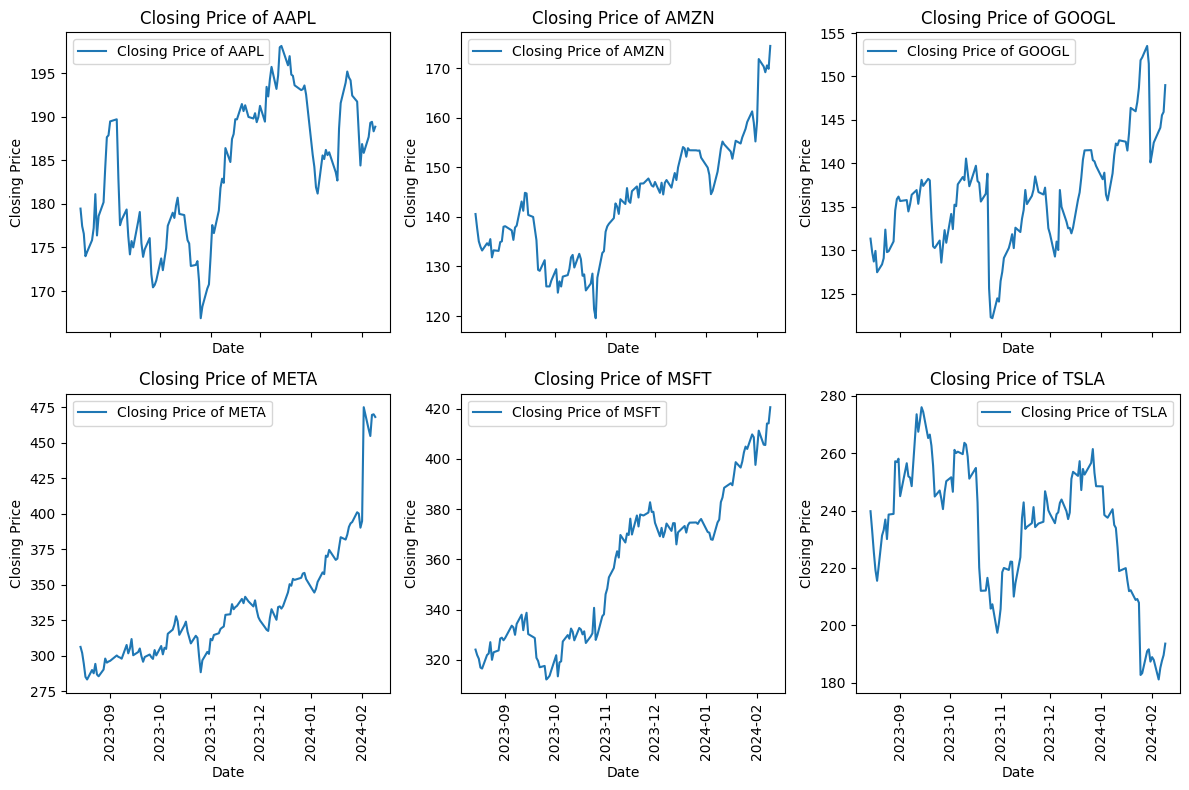

In [ ]:
# Create a new Date column pubDate to have the dates in a separate column other than the indexed date column
# This column will also help us to merge with the News data later for sentiment analysis
# Check if data is a column and not just the index
if 'Date' in yahoo_data.columns:
  # Convert 'Date' to datetime if it's not already
  yahoo_data['Date'] = pd.to_datetime(yahoo_data['Date'])
  # Create a copy of the 'Date' column
  yahoo_data['pubDate'] = yahoo_data['Date']
  # Now set the 'Date' column as the index
  yahoo_data.set_index('Date', inplace=True)

# Create the plot with 'Date' as the index
# To display the chart of each ticker(subplot for each ticker) in 2 rows with 3 charts in one row
nrows = 2
ncols = 3

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8), sharex=True, sharey=False)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each group of data by ticker and plot
for i, (ticker, data) in enumerate(yahoo_data.groupby('Ticker')):
    # Select the axis where the plot will be drawn
    ax = axes[i]

    # Plot the closing price on the selected axis
    ax.plot(data.index, data['Close'], label=f'Closing Price of {ticker}')

    # Set the title and labels
    ax.set_title(f'Closing Price of {ticker}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.legend()

    # Rotate x-axis labels to vertical for each subplot
    for label in ax.get_xticklabels():
        label.set_rotation(90)


# Adjust the layout to prevent overlapping plots
plt.tight_layout()


# Show the plot
plt.show()

Compare the companies using the closing price distribution

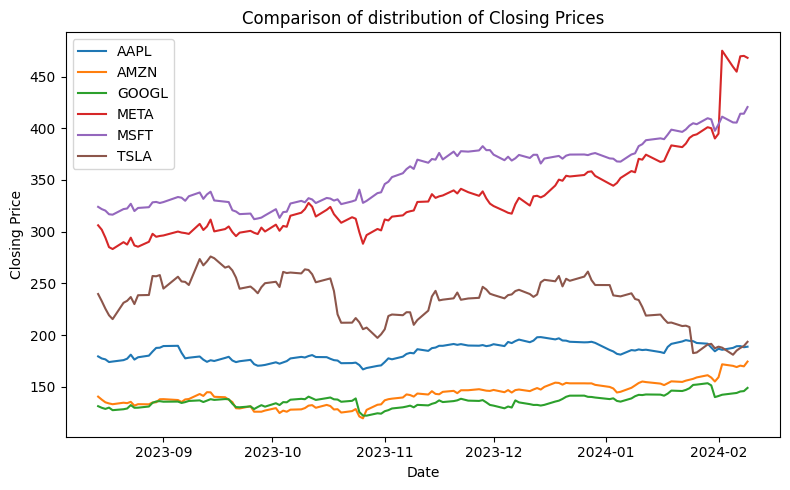

In [ ]:
# Now we'll plot the closing prices of each ticker on the same plot for comparison
plt.figure(figsize=(8, 5))

# Loop through each group of data by ticker and plot
for ticker, data in yahoo_data.groupby('Ticker'):
    plt.plot(data.index, data['Close'], label=ticker)

plt.title('Comparison of distribution of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()  # This ensures each ticker's plot has a label in the legend
plt.tight_layout()
plt.show()


Let's create a trend line plot to look at the closing prices by using the numpy library.

References"
https://dzone.com/articles/python-how-to-add-trend-line-to-line-chartgraph

https://www.statology.org/matplotlib-trendline/


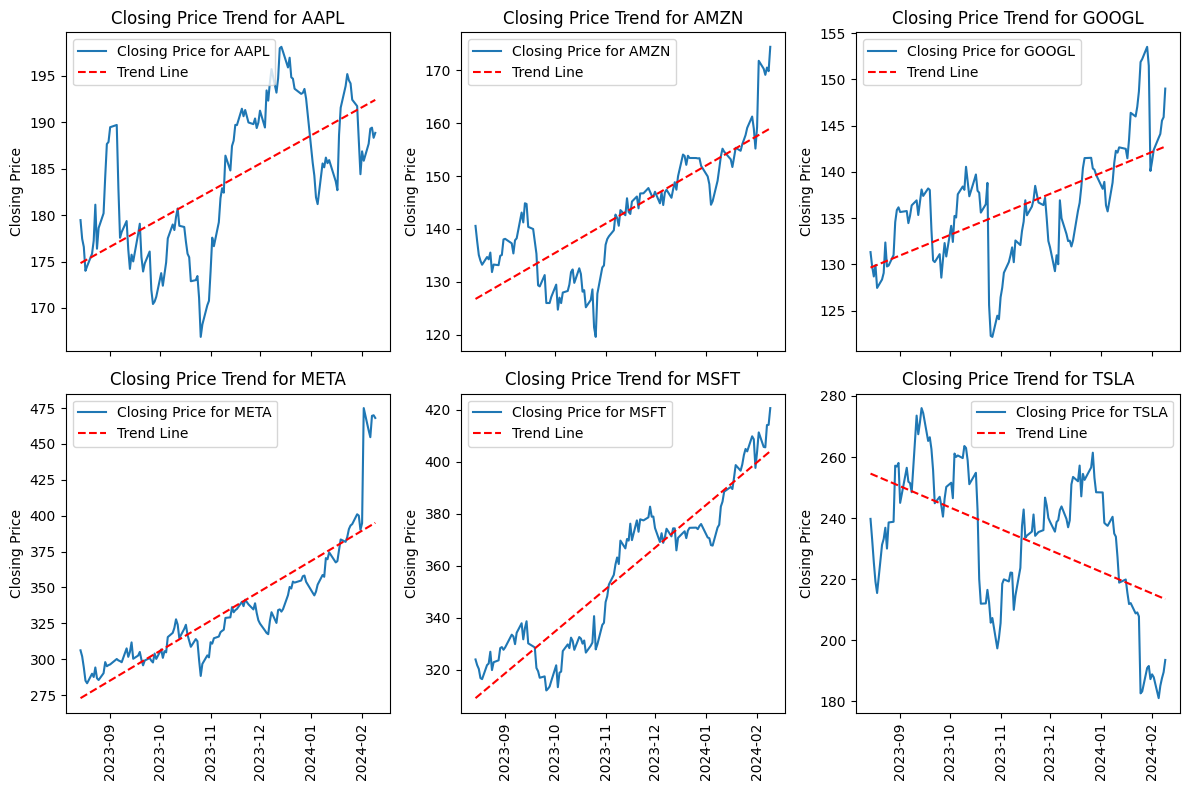

In [ ]:
# Set the figure size for the entire grid of plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharey=False, sharex = True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Group the DataFrame by the 'Ticker' column and plot each group
for i, (ticker, group_data) in enumerate(yahoo_data.groupby('Ticker')):
    ax = axes[i]

    # Plot the 'Close' column against 'Date'
    ax.plot(group_data.index, group_data['Close'], label=f'Closing Price for {ticker}')

    # Calculate and plot the linear trend line
    z = np.polyfit(mdates.date2num(group_data.index), group_data['Close'], 1)
    p = np.poly1d(z)
    ax.plot(group_data.index, p(mdates.date2num(group_data.index)), "r--", label='Trend Line')

    # Set the title
    ax.set_title(f'Closing Price Trend for {ticker}')

    # Set y-axis label
    ax.set_ylabel('Closing Price')

    # Add the legend
    ax.legend()
    # Rotate x-axis labels to vertical for each subplot
    for label in ax.get_xticklabels():
        label.set_rotation(90)

# Adjust the layout to prevent overlapping plots
plt.tight_layout()

# Show the plot
plt.show()

Let's create a line chart to look at the volume of stocks

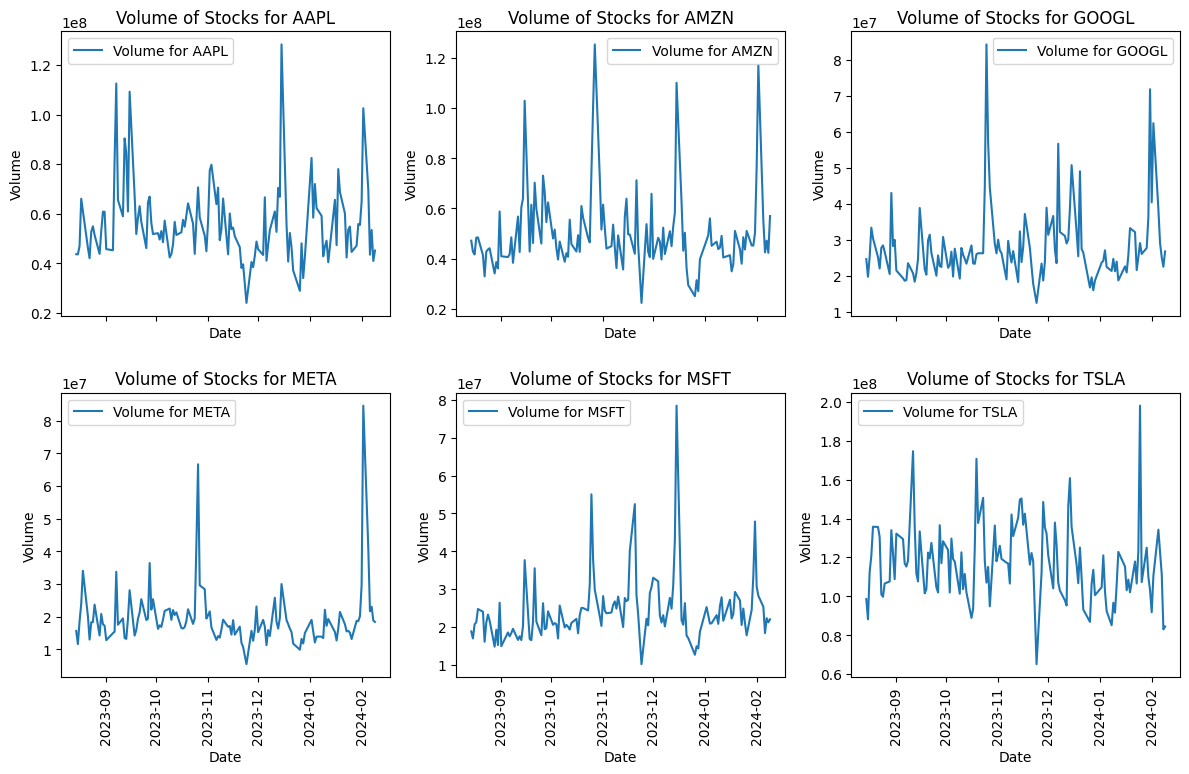

In [ ]:
# Set the number of rows and columns for the subplot grid
nrows = 2
ncols = 3

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8), sharey = False, sharex = True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each group of data by ticker and plot the volume
for i, (ticker, group_data) in enumerate(yahoo_data.groupby('Ticker')):
    ax = axes[i]

    # Plot the 'Volume' column against 'Date'
    ax.plot(group_data.index, group_data['Volume'], label=f'Volume for {ticker}')

    # Set the title and labels
    ax.set_title(f'Volume of Stocks for {ticker}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')

    # Show legend
    ax.legend()
    # Rotate x-axis labels to vertical for each subplot
    for label in ax.get_xticklabels():
        label.set_rotation(90)

# Adjust the layout to prevent overlapping plots
plt.tight_layout()

# Show the plot
plt.show()

Comparison of volume distribution between the companies

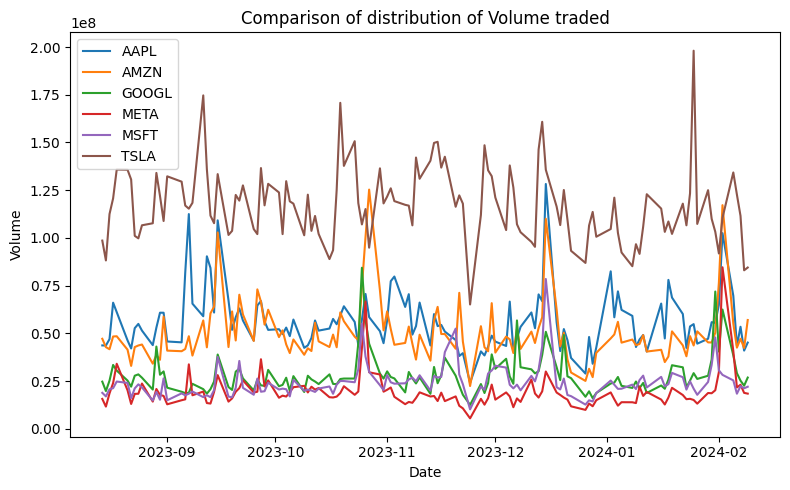

In [ ]:
# Now we'll plot the closing prices of each ticker on the same plot for comparison
plt.figure(figsize=(8, 5))

# Loop through each group of data by ticker and plot
for ticker, data in yahoo_data.groupby('Ticker'):
    plt.plot(data.index, data['Volume'], label=ticker)

plt.title('Comparison of distribution of Volume traded')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()  # This ensures each ticker's plot has a label in the legend
plt.tight_layout()
plt.show()

Let's create a line chart to look at the Moving averages. The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. We can use a list to to store the number of days we want to use.

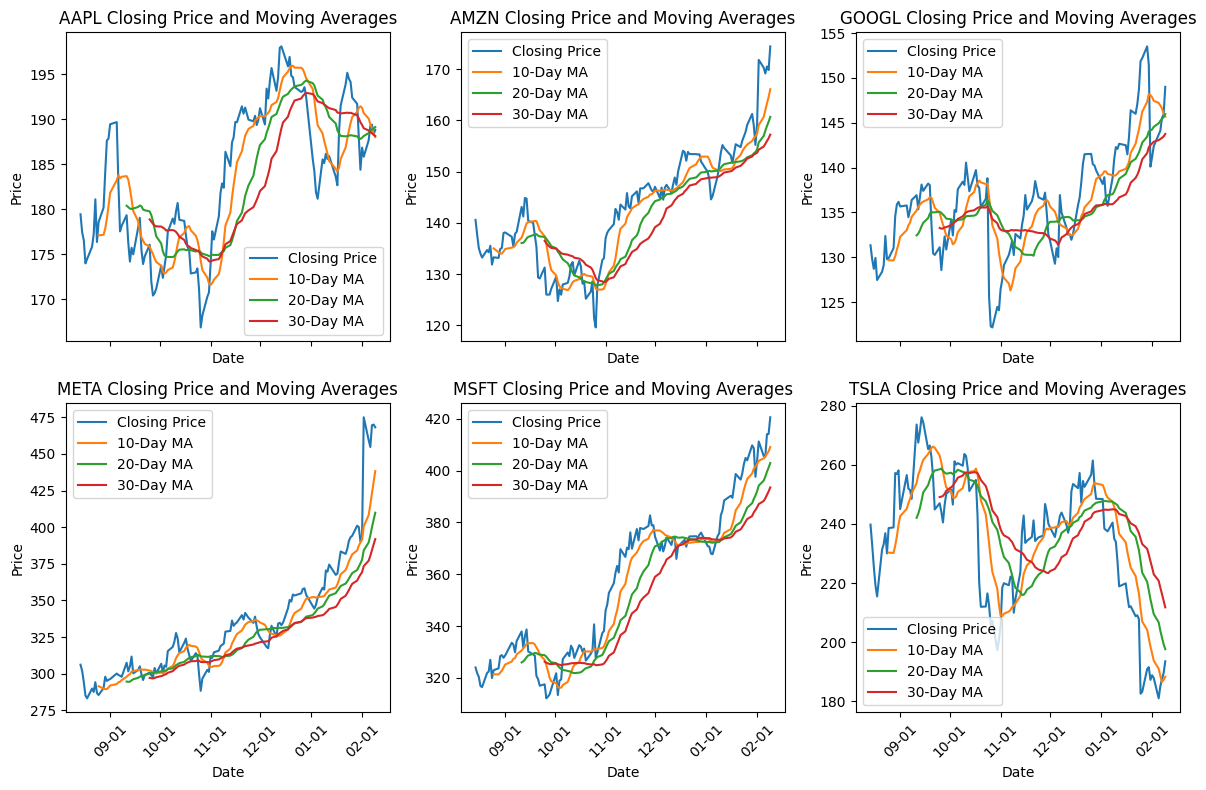

In [ ]:
# Calculate the 5-day and 10-day moving averages
yahoo_data['MA10'] = yahoo_data.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=10).mean())
yahoo_data['MA20'] = yahoo_data.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=20).mean())
yahoo_data['MA30'] = yahoo_data.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=30).mean())

# Set the figure size for the entire grid of plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharex=True, sharey =False)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the date format for the x-axis
date_format = mdates.DateFormatter('%m-%d')

# Group the DataFrame by the 'Ticker' column and plot each group
for i, (ticker, group_data) in enumerate(yahoo_data.groupby('Ticker')):
    ax = axes[i]

    # Plot the 'Close' column and moving averages
    ax.plot(group_data.index, group_data['Close'], label='Closing Price')
    ax.plot(group_data.index, group_data['MA10'], label='10-Day MA')
    ax.plot(group_data.index, group_data['MA20'], label='20-Day MA')
    ax.plot(group_data.index, group_data['MA30'], label='30-Day MA')

    # Set the title and format the x-axis
    ax.set_title(f'{ticker} Closing Price and Moving Averages')
    ax.xaxis.set_major_formatter(date_format)
    # Rotate the date labels for better readability
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

    # Set labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Let's create a histogram to look at the Daily returns. Daily returns are calculated by the percentage change in closing prices from one day to the next.

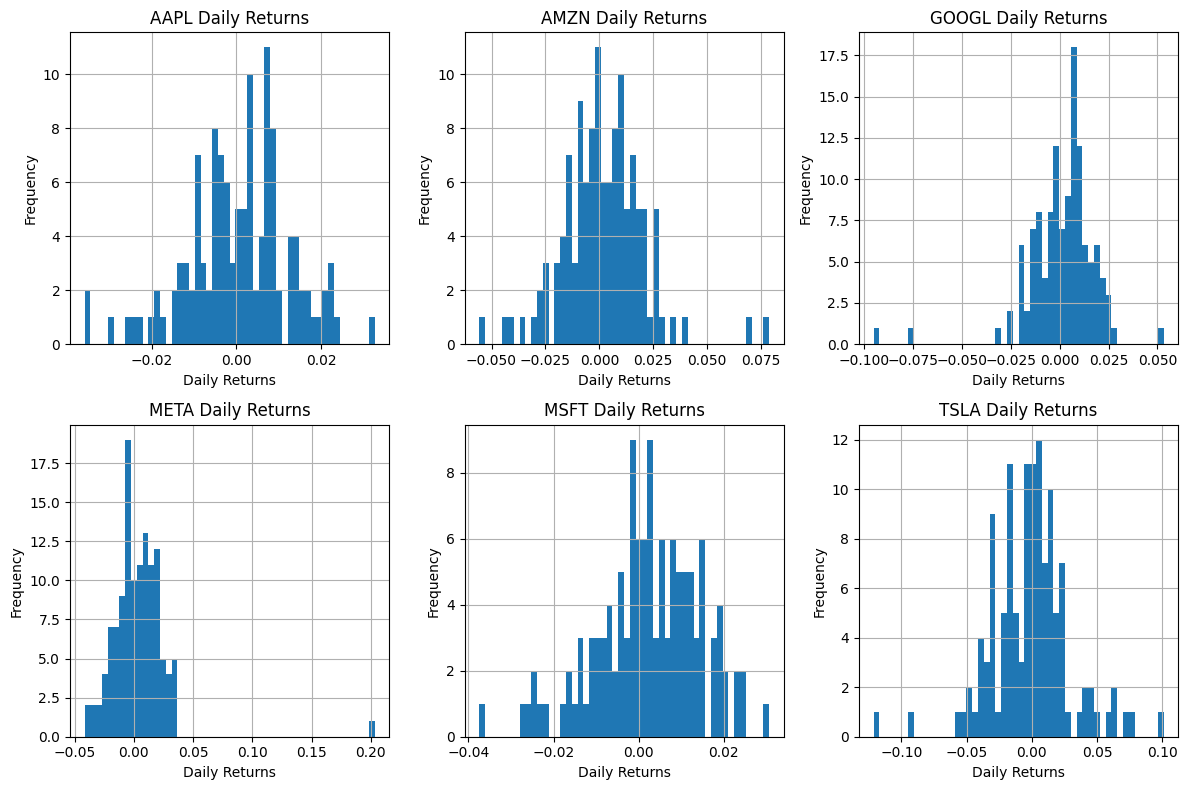

In [ ]:
# Set the number of bins for the histogram
bins = 50

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharex=False, sharey=False)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each ticker in the group and plot the histogram of daily returns
for i, (ticker, group_data) in enumerate(yahoo_data.groupby('Ticker')):
    # Calculate the daily returns for the grouped data
    group_data['Daily Return'] = group_data['Close'].pct_change()

    # Plot the histogram on the respective subplot
    ax = axes[i]
    group_data['Daily Return'].hist(bins=bins, ax=ax)

    # Set title and labels
    ax.set_title(f'{ticker} Daily Returns')
    ax.set_xlabel('Daily Returns')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Adjust the layout to prevent overlapping plots
plt.tight_layout()

# Show the plot
plt.show()

Let's create a scatter plot to look at the change in opening and closing prices per day.

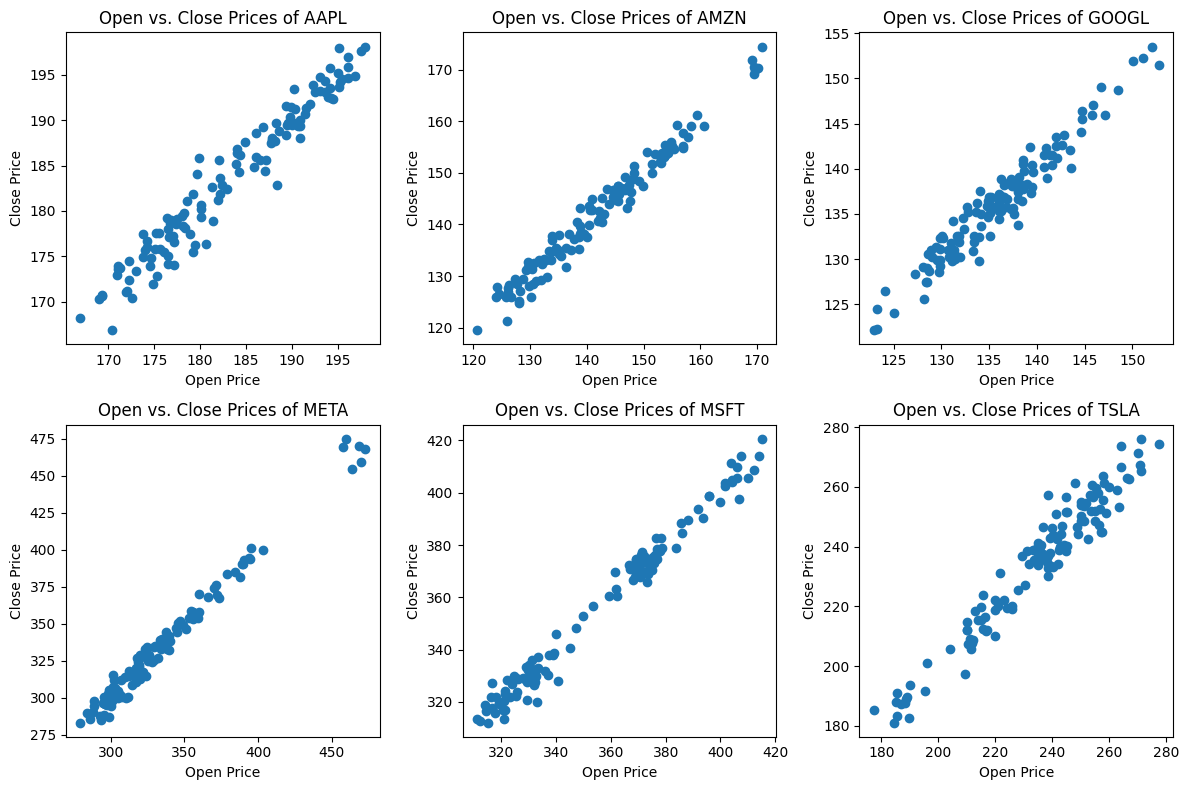

In [ ]:
# Set the figure size for the entire grid of plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))  # Adjust nrows and ncols based on the number of tickers

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each ticker in the group and plot the scatter plot for Open vs. Close prices
for i, (ticker, group_data) in enumerate(yahoo_data.groupby('Ticker')):
    # Create the scatter plot on the respective subplot
    ax = axes[i]
    ax.scatter(group_data['Open'], group_data['Close'])

    # Set title and labels
    ax.set_title(f'Open vs. Close Prices of {ticker}')
    ax.set_xlabel('Open Price')
    ax.set_ylabel('Close Price')

# Adjust the layout to prevent overlapping plots
plt.tight_layout()

# Show the plot
plt.show()


Let's create a correlation heatmap to understand the relation between the different columns within the dataset

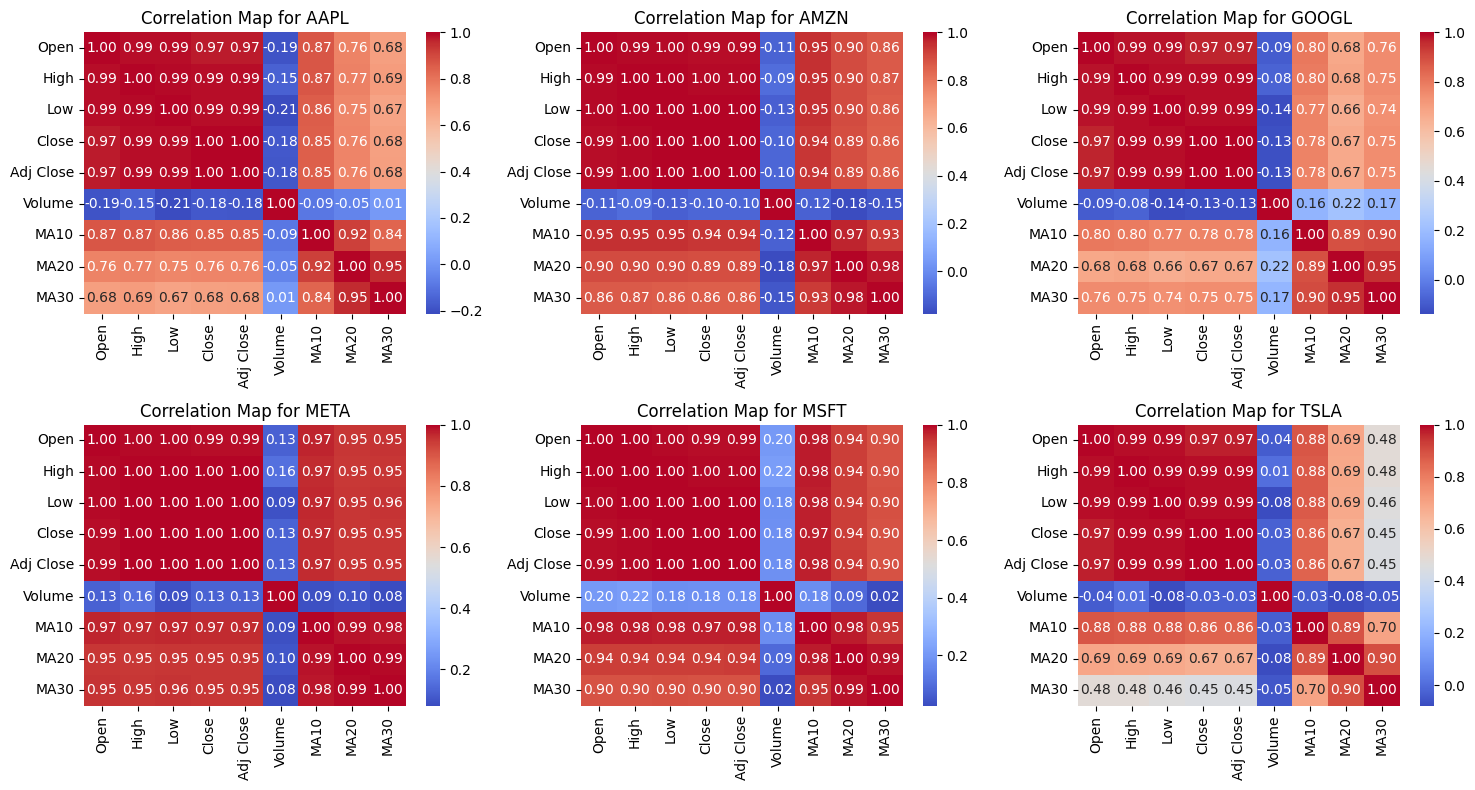

In [ ]:
# Set the figure size for the entire grid of plots
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each group of data by ticker
for i, (ticker, group_data) in enumerate(yahoo_data.groupby('Ticker')):
    # Calculate the correlation matrix for the group
    correlation_matrix = group_data.corr()

    # Plot the heatmap on the respective subplot
    ax = axes[i]
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)

    # Set the title
    ax.set_title(f'Correlation Map for {ticker}')

# Adjust the layout to prevent overlapping plots
plt.tight_layout()

# Show the plot
plt.show()

###Model Building

**Linear Regression Model**

Lets build the prediction model using the simple linear regression . Linear regression uses the relationship between the data-points to draw a straight line through all them.

In [ ]:
# Convert 'pubDate' to datetime and sort by 'Ticker' and 'pubDate' if not already done
yahoo_data['pubDate'] = pd.to_datetime(yahoo_data['pubDate'])
yahoo_data.sort_values(by=['Ticker', 'Date'], inplace=True)

# Create a 'Day' column where sequence restarts for each 'Ticker'
yahoo_data['Day'] = yahoo_data.groupby('Ticker').cumcount()

# Use the 'Day' as the feature for the linear regression model
# Create a feature DataFrame (excluding 'Ticker' from model features but keeping it for later)
X = yahoo_data[['Day']]
y = yahoo_data['Close']

# Perform the split
# Here we split the data but keep track of the tickers for later analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear model
linear_model = LinearRegression()
# Train the model using the training data
linear_model.fit(X_train, y_train)

# Prediction using the linear model
linear_predictions = linear_model.predict(X_test)

# Reattach predictions and tickers to X_test for plotting
X_test = X_test.copy()  # To avoid SettingWithCopyWarning
X_test['Predicted'] = linear_predictions

# Calculate and print the mean squared error to evaluate the model
linear_mse = mean_squared_error(y_test, linear_predictions)
print("Linear Regression Mean Squared Error: ", linear_mse)

Linear Regression Mean Squared Error:  8143.439435841439


Lets plot a chart to compare the actual closing price we had in the test data aganist the predicted closing price calculated by our linear regression model

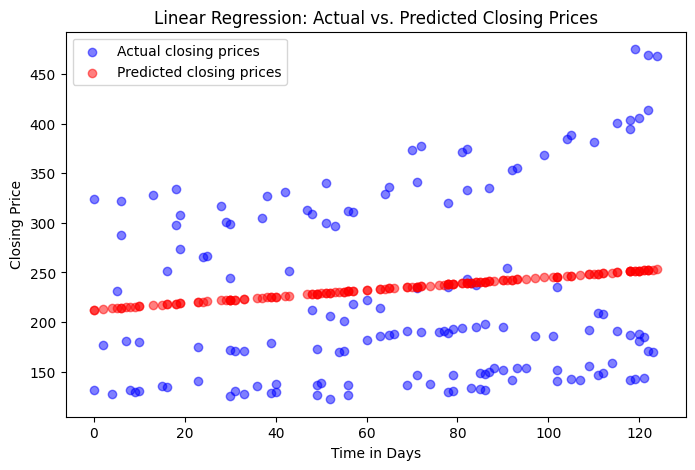

In [ ]:
# X_test is in sequential order and represents days
# y_test has the actual closing prices and the predicted closing prices

# Create the plot
plt.figure(figsize=(8, 5))

# Plot actual closing prices
plt.scatter(X_test['Day'], y_test, color='blue', label='Actual closing prices', alpha=0.5)

# Plot predicted closing prices
plt.scatter(X_test['Day'], linear_predictions, color='red', label='Predicted closing prices', alpha=0.5)

# Add labels
plt.title('Linear Regression: Actual vs. Predicted Closing Prices')
plt.xlabel('Time in Days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


**Multivariable Regression Model**

Lets build the prediction model using the multivariable (multiple linear regression) model. Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.

In [ ]:
# Prepare the data for multiple linear regression
# Select the columns that we will use as features
X = yahoo_data[['Open', 'High', 'Low', 'Volume', 'Day']]

# Set the target variable
y = yahoo_data['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
multiple_linear_model = LinearRegression()
# Train the model with the training data
multiple_linear_model.fit(X_train, y_train)

# Predict the closing price for the test data
multiple_linear_predictions = multiple_linear_model.predict(X_test)

# Calculate and print the mean squared error to evaluate the model
multiple_linear_mse = mean_squared_error(y_test, multiple_linear_predictions)
print("Multiple Linear Regression Mean Squared Error: ", multiple_linear_mse)

Multiple Linear Regression Mean Squared Error:  2.0516316291568004


Lets plot a chart to compare the actual closing price we had in the test data aganist the predicted closing price calculated by our multiple linear regression model

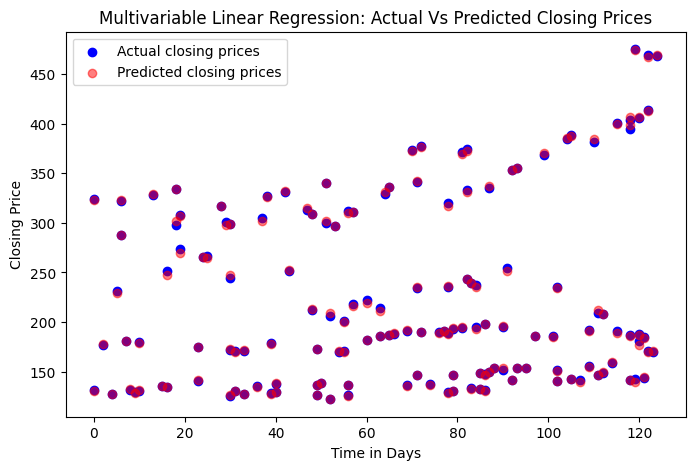

In [ ]:
# X_test has all the columns selected as features in our test data
# y_test has the actual closing prices and the predicted closing prices

# Plot the chart
plt.figure(figsize=(8, 5))

# Plot actual closing prices
plt.scatter(X_test['Day'], y_test, color='blue', label='Actual closing prices')

# Plot predicted closing prices
plt.scatter(X_test['Day'], multiple_linear_predictions, color='red', label='Predicted closing prices', alpha=0.5)

# Add labels
plt.title('Multivariable Linear Regression: Actual Vs Predicted Closing Prices')
plt.xlabel('Time in Days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

**Random Forest Model**

Lets build the prediction model using the Random forests model. Random forests are a way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance.

In [ ]:
# Prepare the data for multiple linear regression
# Select the columns that we will use as features
X = yahoo_data[['Open', 'High', 'Low', 'Volume', 'Day']]

# Set the target variable
y = yahoo_data['Close']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=75, random_state=42)
random_forest_model.fit(X_train, y_train)

# Prediction using the Random Forest model
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluating the Random Forest model
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
print("Random Forest Mean Squared Error: ", random_forest_mse)

Random Forest Mean Squared Error:  9.181053484740085


Lets plot a chart to compare the actual closing price we had in the test data aganist the predicted closing price calculated by our multiple linear regression model

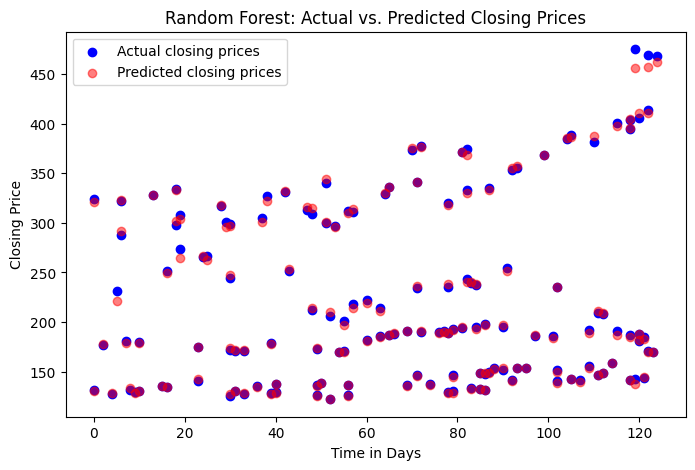

In [ ]:
# X_test has all the columns selected as features in our test data
# y_test has the actual closing prices and the predicted closing prices

# Plot the chart
plt.figure(figsize=(8, 5))

# Plot actual closing prices
plt.scatter(X_test['Day'], y_test, color='blue', label='Actual closing prices')

# Plot predicted closing prices
plt.scatter(X_test['Day'], random_forest_predictions, color='red', label='Predicted closing prices', alpha=0.5)

# Add labels
plt.title('Random Forest: Actual vs. Predicted Closing Prices')
plt.xlabel('Time in Days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# **Enhance Stock Prediction Model**

Incorporating additional datasets such as social media sentiment, natural disasters, and health impacts like COVID-19 can potentially improve the accuracy of stock prediction models by accounting for external factors that might affect stock prices.

References sentiment analysis for stock prediction:

https://towardsdatascience.com/stock-news-sentiment-analysis-with-python-193d4b4378d4

https://towardsdatascience.com/sentiment-analysis-for-stock-price-prediction-in-python-bed40c65d178

https://medium.datadriveninvestor.com/sentiment-analysis-of-stocks-from-financial-news-using-python-82ebdcefb638

https://medium.datadriveninvestor.com/build-a-stock-sentiment-web-app-with-flask-and-deploy-it-online-3930e58a236c

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10403218/

https://blog.gopenai.com/building-news-sentiment-and-stock-price-performance-analysis-nlp-application-with-python-794bbb312333


**<h3>Use Sentiment Analysis for Stock prediction</h3>**

Let's use the news data from NewsData.io alongside financial data from Yahoo Finance for stock price prediction.

https://newsdata.io/

The NewsData.io with a basic subscription gives you the ability to download upto 6 months of historical dataset or use API to get the data dynamically. Given that there is a monthly limit, for this project we have downloaded the News Data set using another Python project for the following conditions:
* Title has keywords Google, Microsoft, Tesla, Amazon, Meta and Apple
* Published between 08-14-2023 and 02-12-2024
* Language of the articles is English
* The news article belongs to Technology or Business categories
* The source of the articles belong to the top priority domain

We have 6 datasets that have been downloaded, each dataset belongs to a particular stock company.

Data Dictionary
* Ticker -  Name of the Company (custom column and value added while downloading and creating the csv)
* article_id	- Unique ID of the article
* title	 - Title of the article
* description	- Content of the  article
* pubDate	 - Article publsihed date


Lets load the datasets and create dataframes for each one of the separately

In [ ]:
# Define the file paths for each company's CSV file
google_file_path = 'GoogleNews.csv'
microsoft_file_path = 'MicrosoftNews.csv'
apple_file_path = 'AppleNews.csv'
amazon_file_path = 'AmazonNews.csv'
meta_file_path = 'MetaNews.csv'
tesla_file_path = 'TeslaNews.csv'

# Read the CSV file for Google into a DataFrame and process it
google_df = pd.read_csv(google_file_path)
google_df['Company'] = google_df['Ticker']  # Copy 'Ticker' to 'Company'
# Update the 'Ticker' column with the ticker symbol
google_df['Ticker'] = 'GOOG'
# Convert 'pubDate' to just date format
google_df['pubDate'] = pd.to_datetime(google_df['pubDate']).dt.date

# Repeat the process for Microsoft
microsoft_df = pd.read_csv(microsoft_file_path)
microsoft_df['Company'] = microsoft_df['Ticker']
microsoft_df['Ticker'] = 'MSFT'
microsoft_df['pubDate'] = pd.to_datetime(microsoft_df['pubDate']).dt.date

# Repeat the process for Apple
apple_df = pd.read_csv(apple_file_path)
apple_df['Company'] = apple_df['Ticker']
apple_df['Ticker'] = 'AAPL'
apple_df['pubDate'] = pd.to_datetime(apple_df['pubDate']).dt.date

# Repeat the process for Amazon
amazon_df = pd.read_csv(amazon_file_path)
amazon_df['Company'] = amazon_df['Ticker']
amazon_df['Ticker'] = 'AMZN'
amazon_df['pubDate'] = pd.to_datetime(amazon_df['pubDate']).dt.date

# Repeat the process for Tesla
tesla_df = pd.read_csv(tesla_file_path)
tesla_df['Company'] = tesla_df['Ticker']
tesla_df['Ticker'] = 'TSLA'
tesla_df['pubDate'] = pd.to_datetime(tesla_df['pubDate']).dt.date

# Repeat the process for Meta
meta_df = pd.read_csv(meta_file_path)
meta_df['Company'] = meta_df['Ticker']
meta_df['Ticker'] = 'META'
meta_df['pubDate'] = pd.to_datetime(meta_df['pubDate']).dt.date


Lets look at the shape, columns and the value of the first row of the dataframes.

In [ ]:
# Display the number of records returned
print("The number of records in Google News dataframe:",google_df.shape)
# Display the column information of the news data
print("The columns in Google News dataframe:",google_df.columns)
# Display the first row of the news data
google_df.head(1)


The number of records in Google News dataframe: (900, 6)
The columns in Google News dataframe: Index(['article_id', 'title', 'description', 'pubDate', 'Ticker', 'Company'], dtype='object')


,article_id,title,description,pubDate,Ticker,Company
0,6be12cb0a301003cc214b9f70aa91512,"Google vs the US government: What, why and all...",The US Justice Department and state attorneys ...,2023-09-12,GOOG,Google


In [ ]:
# Display the number of records returned
print("The number of records in Microsoft News dataframe:",microsoft_df.shape)
# Display the column information of the news data
print("The columns in Microsoft News dataframe:",microsoft_df.columns)
# Display the first row of the news data
microsoft_df.head(1)

The number of records in Microsoft News dataframe: (900, 6)
The columns in Microsoft News dataframe: Index(['article_id', 'title', 'description', 'pubDate', 'Ticker', 'Company'], dtype='object')


,article_id,title,description,pubDate,Ticker,Company
0,4435ca089dc320d96c19095687fd4555,Hackers are sending malware through seemingly ...,Microsoft Teams is subject to a new phishing m...,2023-09-11,MSFT,Microsoft


In [ ]:
# Display the number of records returned
print("The number of records in Apple News dataframe:",apple_df.shape)
# Display the column information of the news data
print("The columns in Apple News dataframe:",apple_df.columns)
# Display the first row of the news data
apple_df.head(1)

The number of records in Apple News dataframe: (900, 6)
The columns in Apple News dataframe: Index(['article_id', 'title', 'description', 'pubDate', 'Ticker', 'Company'], dtype='object')


,article_id,title,description,pubDate,Ticker,Company
0,ae96801ff3e187e5f66a79da16d24038,Apple iPhone 15 LIVE updates: The iPhone 15 se...,Apple iPhone 15 Launch Live: The iPhone 15 ser...,2023-09-12,AAPL,Apple


In [ ]:
# Display the number of records returned
print("The number of records in Amazon News dataframe:",amazon_df.shape)
# Display the column information of the news data
print("The columns in Amazon News dataframe:",amazon_df.columns)
# Display the first row of the news data
amazon_df.head(1)

The number of records in Amazon News dataframe: (900, 6)
The columns in Amazon News dataframe: Index(['article_id', 'title', 'description', 'pubDate', 'Ticker', 'Company'], dtype='object')


,article_id,title,description,pubDate,Ticker,Company
0,99f0b0f3672c93465e0d8e6a433df0a0,Amazon Prime Video to stream new thriller ‘Wil...,Viewership of international content on over-th...,2023-09-12,AMZN,Amazon


In [ ]:
# Display the number of records returned
print("The number of records in Tesla News dataframe:",tesla_df.shape)
# Display the column information of the news data
print("The columns in Tesla News dataframe:",tesla_df.columns)
# Display the first row of the news data
tesla_df.head(1)

The number of records in Tesla News dataframe: (900, 6)
The columns in Tesla News dataframe: Index(['article_id', 'title', 'description', 'pubDate', 'Ticker', 'Company'], dtype='object')


,article_id,title,description,pubDate,Ticker,Company
0,c8bb73ee779c846f4fff8f7f7150a5b5,Enter Dojo: Tesla’s AI supercomputer could be ...,Tesla shares have soared after a bullish repor...,2023-09-12,TSLA,Tesla


In [ ]:
# Display the number of records returned
print("The number of records in Meta News dataframe:",meta_df.shape)
# Display the column information of the news data
print("The columns in Meta News dataframe:",meta_df.columns)
# Display the first row of the news data
meta_df.head(1)

The number of records in Meta News dataframe: (900, 6)
The columns in Meta News dataframe: Index(['article_id', 'title', 'description', 'pubDate', 'Ticker', 'Company'], dtype='object')


,article_id,title,description,pubDate,Ticker,Company
0,201af0885f4095a8a0737959bd432a9c,Meta Quest VR headset adds new avatar creator ...,Meta has added more avatar creator customizati...,2023-09-12,META,Meta


Lets use the TextBlob library for a simple sentiment analysis on the description field for each dataframe

Reference:

https://textblob.readthedocs.io/en/dev/quickstart.html

https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524



Lets prepare the data for sentiment analysis, make sure the decsription field is not empty. If it is empty then populate with title field

Check for empty description fields in the dataframes

In [ ]:
dataframes = {'Google': google_df, 'Microsoft': microsoft_df, 'Apple': apple_df, 'Amazon': amazon_df, 'Tesla': tesla_df, 'Meta': meta_df}

for company, df_descnull in dataframes.items():
    empty_desc_count = df_descnull['description'].isnull().sum()
    print("Count of empty description field in ", company, "DataFrame:", empty_desc_count)

Count of empty description field in  Google DataFrame: 59
Count of empty description field in  Microsoft DataFrame: 94
Count of empty description field in  Apple DataFrame: 58
Count of empty description field in  Amazon DataFrame: 101
Count of empty description field in  Tesla DataFrame: 213
Count of empty description field in  Meta DataFrame: 81


In [ ]:
# Define a function to perform the operation to check for empty description values and replace it with the title
def fill_empty_descriptions(df):
    # Identify empty or NaN values in 'description' and replace them with 'title'
    df['description'] = df['description'].replace('', pd.NA)  # Replace empty strings with NaN for consistency
    df['description'].fillna(df['title'], inplace=True)
    return df

# Apply the function to each DataFrame
google_df = fill_empty_descriptions(google_df)
microsoft_df = fill_empty_descriptions(microsoft_df)
apple_df = fill_empty_descriptions(apple_df)
tesla_df = fill_empty_descriptions(tesla_df)
meta_df = fill_empty_descriptions(meta_df)
amazon_df = fill_empty_descriptions(amazon_df)

# Now, all empty 'description' fields in each DataFrame have been replaced with the 'title' of that row

 **Perform Sentiment Analysis on description**

In [ ]:
from textblob import TextBlob
dataframes = {'Google': google_df, 'Microsoft': microsoft_df, 'Apple': apple_df, 'Amazon': amazon_df, 'Tesla': tesla_df, 'Meta': meta_df}

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    try:
        # Return the polarity score of the text
        return TextBlob(str(text)).sentiment.polarity
    except:
        # In case of any error, return None or some default value
        return None

# Apply sentiment analysis to the 'description' field of each DataFrame
for company, df in dataframes.items():
    df['Sentiment'] = df['description'].apply(calculate_sentiment)
    print(f"Sentiment analysis completed for {company}")



Sentiment analysis completed for Google
Sentiment analysis completed for Microsoft
Sentiment analysis completed for Apple
Sentiment analysis completed for Amazon
Sentiment analysis completed for Tesla
Sentiment analysis completed for Meta


If we have multiple news articles per day for the company then we want to aggregate sentiment scores for each day:

**Aggregate Sentiment Scores**

In [ ]:
dataframes = {'Google': google_df, 'Microsoft': microsoft_df, 'Apple': apple_df, 'Amazon': amazon_df, 'Tesla': tesla_df, 'Meta': meta_df}

aggregated_data = []

for company, df in dataframes.items():
    # Ensure 'pubDate' is in datetime format
    df['pubDate'] = pd.to_datetime(df['pubDate'])

    # Group by 'pubDate' and 'Ticker' to aggregate the sentiment scores
    # This maintains the original 'Ticker' values from each DataFrame
    aggregated_sentiment = df.groupby(['pubDate', 'Ticker'])['Sentiment'].mean().reset_index()

    # Append the processed DataFrame to the list
    aggregated_data.append(aggregated_sentiment)

# Concatenate all the processed DataFrames into one
news_data = pd.concat(aggregated_data, ignore_index=True)

# Display the first 5 rows of the combined dataframe with aggregated sentiment score for eahc company
news_data.head()

,pubDate,Ticker,Sentiment
0,2023-09-06,GOOG,0.070328
1,2023-09-07,GOOG,0.099444
2,2023-09-08,GOOG,0.144145
3,2023-09-09,GOOG,0.248822
4,2023-09-10,GOOG,0.192226


**Combine Yahoo Finance data with the News Data for further analysis**

In [ ]:
# First, ensure 'pubDate' is in datetime format in both DataFrames
news_data['pubDate'] = pd.to_datetime(news_data['pubDate'])
yahoo_data['pubDate'] = pd.to_datetime(yahoo_data['pubDate'])

# Now, perform the merge on 'pubDate' and 'Ticker'
news_yahoo_data = pd.merge(news_data, yahoo_data, on=['pubDate', 'Ticker'], how='inner')

# Fill missing sentiment values with a default (e.g., 0 or mean sentiment)
news_yahoo_data['Sentiment'].fillna(news_yahoo_data['Sentiment'].mean(), inplace=True)

# Fill missing sentiment values with a default (e.g., 0 or mean sentiment)
news_yahoo_data['Sentiment'].fillna(news_yahoo_data['Sentiment'].mean(), inplace=True)

# Display the first 5 rows of the combined news and yahoo data
news_yahoo_data.head()

,pubDate,Ticker,Sentiment,Open,High,Low,Close,Adj Close,Volume,MA10,MA20,MA30,Day
0,2023-08-25,MSFT,0.085647,321.470001,325.359985,318.799988,322.980011,321.730835,21684100,321.395001,NaN,NaN,9
1,2023-08-28,MSFT,0.161596,325.660004,326.149994,321.720001,323.700012,322.448059,14808500,321.361002,NaN,NaN,10
2,2023-08-29,MSFT,0.177173,321.880005,328.980011,321.880005,328.410004,327.139832,19284600,322.016003,NaN,NaN,11
3,2023-08-30,MSFT,0.142956,328.670013,329.809998,326.450012,328.790009,327.518341,15222100,322.855005,NaN,NaN,12
4,2023-08-31,MSFT,0.086470,329.200012,330.910004,326.779999,327.760010,326.492371,26411000,323.943005,NaN,NaN,13


###EDA with Sentiment Analysis

 Lets create plots to understand the relationship between the sentiment scores and the stock prices.

Check the distribution of the sentiment scores.

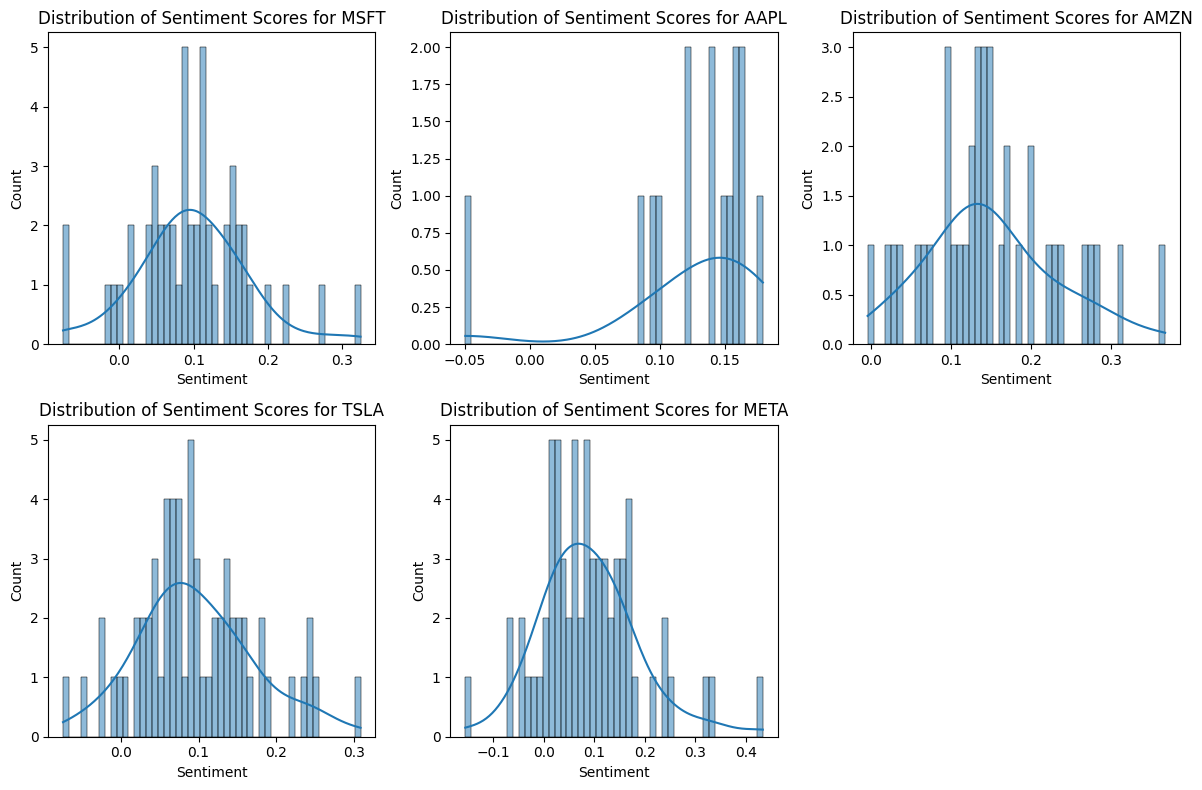

In [ ]:
# Getting unique tickers from news_yahoo_data, combined DataFrame
unique_tickers = news_yahoo_data['Ticker'].unique()

# Set the number of rows and columns for the subplot grid
nrows = 2
ncols = 3

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each unique ticker and create a subplot for its sentiment score distribution
for i, ticker in enumerate(unique_tickers):
    ax = axes[i]
    # Filter the DataFrame for the current ticker
    ticker_data = news_yahoo_data[news_yahoo_data['Ticker'] == ticker]
    # Plot the sentiment score distribution for the current ticker
    sns.histplot(ticker_data['Sentiment'], bins=50, kde=True, ax=ax)
    ax.set_title(f'Distribution of Sentiment Scores for {ticker}')


# If there are any remaining empty subplots, hide them
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()

Plot the sentiment scores over time to see how they change.

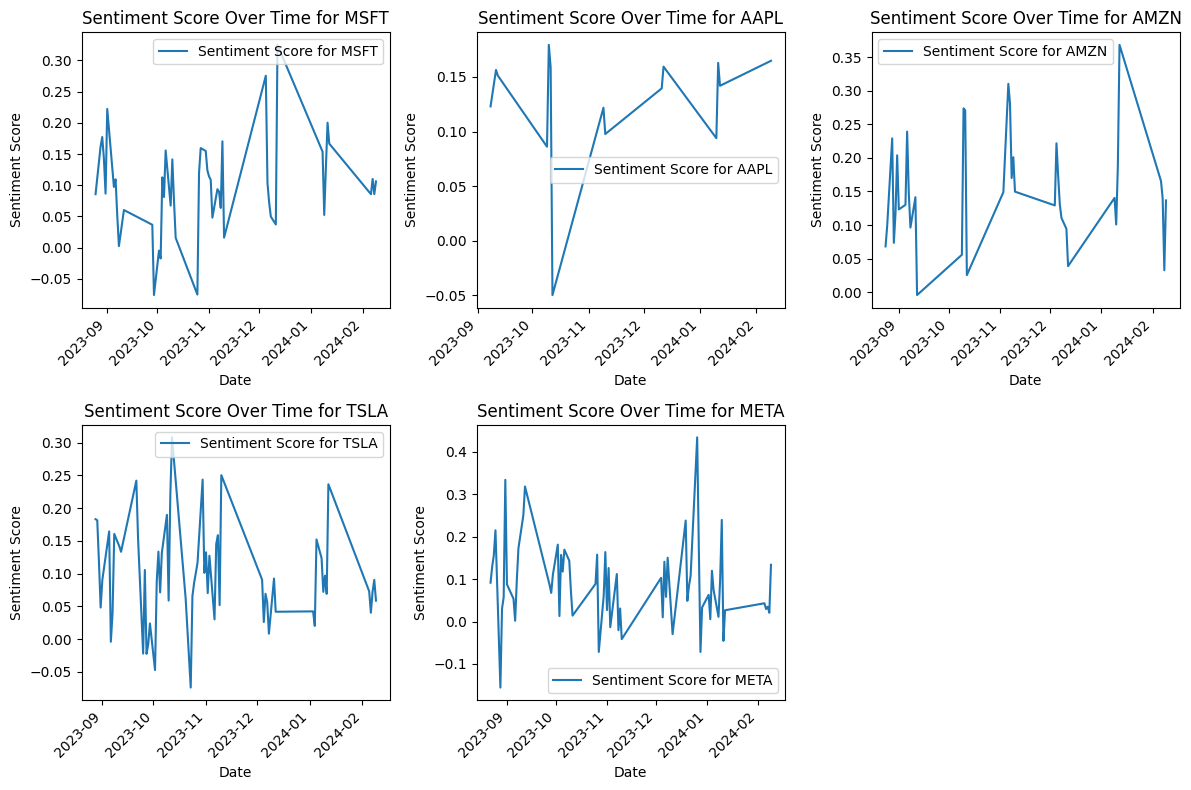

In [ ]:
unique_tickers = news_yahoo_data['Ticker'].unique()

# Set the number of rows and columns for the subplot grid
nrows = 2
ncols = 3

# Calculate the total number of subplots needed
total_plots = len(unique_tickers)

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each unique ticker and create a subplot for its sentiment score over time
for i, ticker in enumerate(unique_tickers):
    ax = axes[i]
    # Filter the DataFrame for the current ticker
    ticker_data = news_yahoo_data[news_yahoo_data['Ticker'] == ticker]
    # Plot the sentiment score over time for the current ticker
    ax.plot(ticker_data['pubDate'], ticker_data['Sentiment'], label=f'Sentiment Score for {ticker}')
    ax.set_title(f'Sentiment Score Over Time for {ticker}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Sentiment Score')
    ax.legend()
    # Optionally, format the x-axis date labels for better readability
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# If there are any remaining empty subplots, hide them
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()

Compare the sentiment score distribution over time for all the tickers

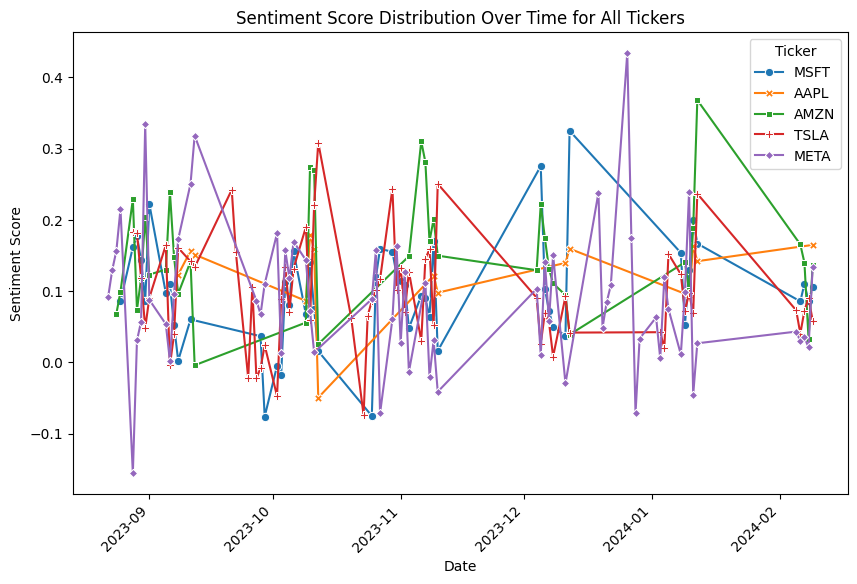

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Use seaborn's lineplot to handle different ticker's sentiment scores over time
sns.lineplot(data=news_yahoo_data, x='pubDate', y='Sentiment', hue='Ticker', style='Ticker', markers=True, dashes=False)

# Adding plot title and labels
plt.title('Sentiment Score Distribution Over Time for All Tickers')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend(title='Ticker')

# Optionally, format the x-axis date labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


Analyze how sentiment correlates with daily returns and stock prices.

In [ ]:
# Calculate daily returns for each ticker within the group
news_yahoo_data['Daily Return'] = news_yahoo_data.groupby('Ticker')['Close'].pct_change()

# Initialize an empty dictionary to store the correlation DataFrames for each ticker
ticker_correlations = {}

# Group the DataFrame by 'Ticker' and calculate correlations within each group
for ticker, group in news_yahoo_data.groupby('Ticker'):
    # Calculate the correlation of sentiment with closing prices and daily returns for the group
    correlation = group[['Sentiment', 'Close', 'Daily Return']].corr()

    # Store the correlation DataFrame in the dictionary, keyed by ticker
    ticker_correlations[ticker] = correlation

# Now, ticker_correlations contains a correlation DataFrame for each ticker
for ticker, correlation_df in ticker_correlations.items():
    print(f"Correlation for {ticker}:")
    print(correlation_df, '\n')


Correlation for AAPL:
              Sentiment     Close  Daily Return
Sentiment      1.000000  0.147358      0.026441
Close          0.147358  1.000000      0.312510
Daily Return   0.026441  0.312510      1.000000 

Correlation for AMZN:
              Sentiment     Close  Daily Return
Sentiment      1.000000 -0.038508      0.173999
Close         -0.038508  1.000000      0.385170
Daily Return   0.173999  0.385170      1.000000 

Correlation for META:
              Sentiment     Close  Daily Return
Sentiment      1.000000 -0.120030     -0.026296
Close         -0.120030  1.000000      0.348596
Daily Return  -0.026296  0.348596      1.000000 

Correlation for MSFT:
              Sentiment     Close  Daily Return
Sentiment      1.000000  0.220182      0.049309
Close          0.220182  1.000000      0.324337
Daily Return   0.049309  0.324337      1.000000 

Correlation for TSLA:
              Sentiment     Close  Daily Return
Sentiment      1.000000  0.100474      0.003008
Close          0.1

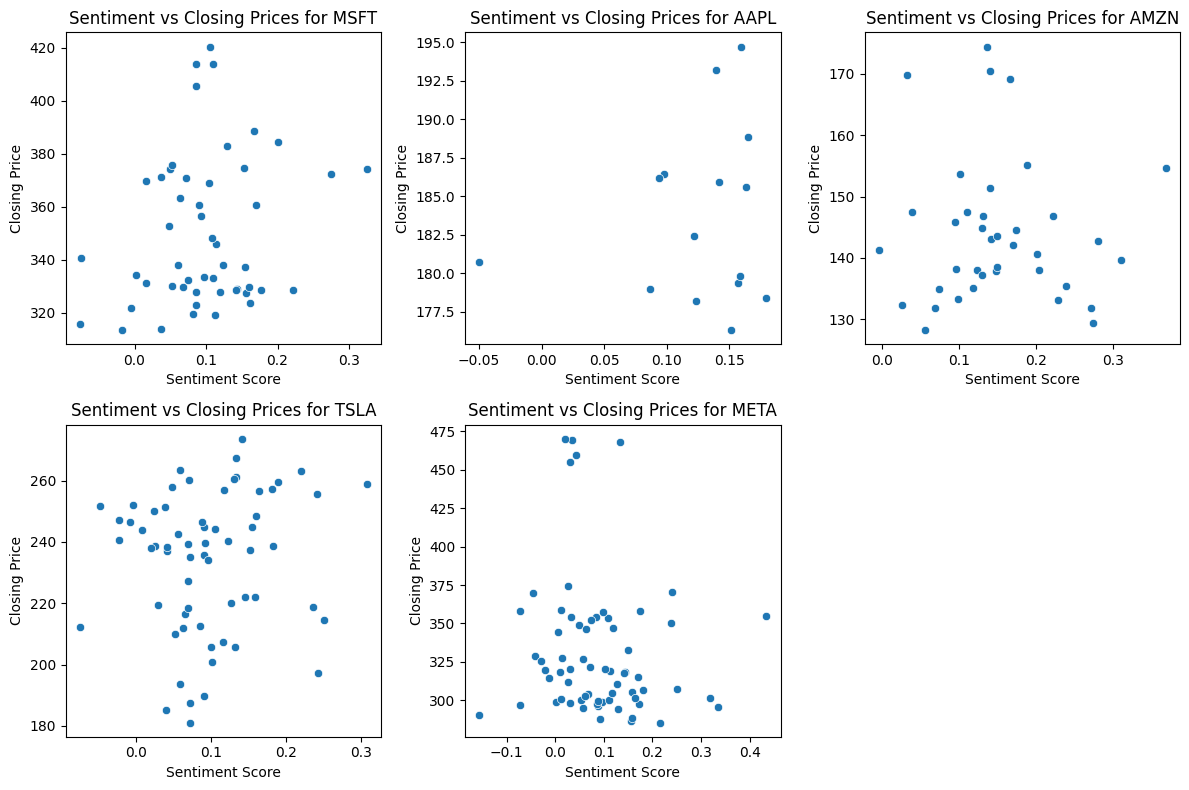

In [ ]:
unique_tickers = news_yahoo_data['Ticker'].unique()

# Set the number of rows and columns for the subplot grid
nrows = 2
ncols = 3

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each unique ticker and create a scatter plot for sentiment vs. closing prices
for i, ticker in enumerate(unique_tickers):
    # Filter the DataFrame for the current ticker
    ticker_data = news_yahoo_data[news_yahoo_data['Ticker'] == ticker]
    # Create a scatter plot for the current ticker
    sns.scatterplot(x='Sentiment', y='Close', data=ticker_data, ax=axes[i])
    axes[i].set_title(f'Sentiment vs Closing Prices for {ticker}')

    # Optionally, adjust the x and y labels for clarity or aesthetics
    axes[i].set_xlabel('Sentiment Score')
    axes[i].set_ylabel('Closing Price')

# If there are any remaining empty subplots, hide them
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()

####Model Building with Sentiment Feature

Lets include sentiment score into building the models and see if the predictive performance improves.

Model Building:
Lets build the linear regression, multivariable regression and the random forest model.

**Linear Regression Model**

In [ ]:
# Feature Selection
X = news_yahoo_data[['Sentiment','Day']]  # Using 'sentiment' as the sole feature for simple linear regression
y = news_yahoo_data['Close']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Initialization and Training
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train, y_train)

# Predictions
linear_predictions_sentiment = simple_linear_model.predict(X_test)

# Evaluation
linear_mse_sentiment = mean_squared_error(y_test, linear_predictions_sentiment)
print(f'Simple Linear Regression MSE with sentiment analysis: {linear_mse_sentiment}')

Simple Linear Regression MSE with sentiment analysis: 5214.257518177014


Plot a chart to visualize the Actual price vs Predicted price by the Linear Regression model

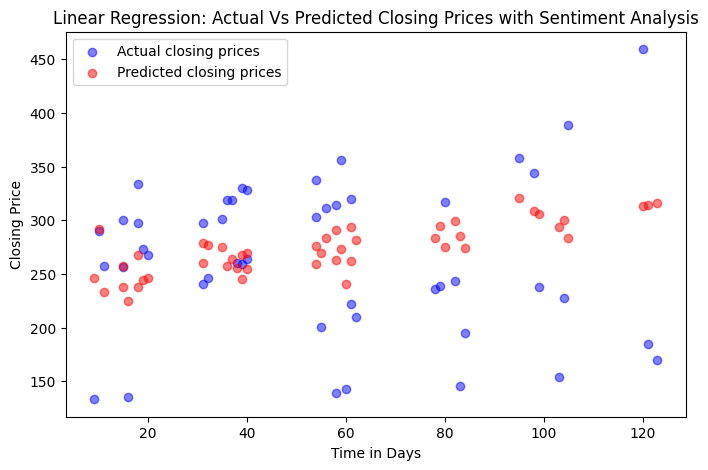

In [ ]:
# X_test is in sequential order and represents days
# y_test has the actual closing prices and the predicted closing prices

# Create the plot
plt.figure(figsize=(8, 5))

# Plot actual closing prices
plt.scatter(X_test['Day'], y_test, color='blue', label='Actual closing prices', alpha=0.5)

# Plot predicted closing prices
plt.scatter(X_test['Day'], linear_predictions_sentiment, color='red', label='Predicted closing prices', alpha=0.5)

# Add labels
plt.title('Linear Regression: Actual Vs Predicted Closing Prices with Sentiment Analysis')
plt.xlabel('Time in Days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

**Multivariable Regression Model**

In [ ]:
# Feature Selection for Multivariable Regression
X_multi = news_yahoo_data[['Open', 'High', 'Low', 'Volume', 'Day', 'Sentiment']]
y_multi = news_yahoo_data['Close']

# Splitting the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.5, random_state=42)

# Model Initialization and Training
multi_linear_model = LinearRegression()
multi_linear_model.fit(X_train_multi, y_train_multi)

# Predictions
multivariable_predictions_sentiment = multi_linear_model.predict(X_test_multi)

# Evaluation
multivariable_mse_sentiment = mean_squared_error(y_test_multi, multivariable_predictions_sentiment)
print(f'Multivariable Linear Regression MSE with Sentiment Analysis: {multivariable_mse_sentiment}')

Multivariable Linear Regression MSE with Sentiment Analysis: 4.464519821824686


Plot a chart to visualize the Actual price vs Predicted price by the Multivariable Linear Regression model

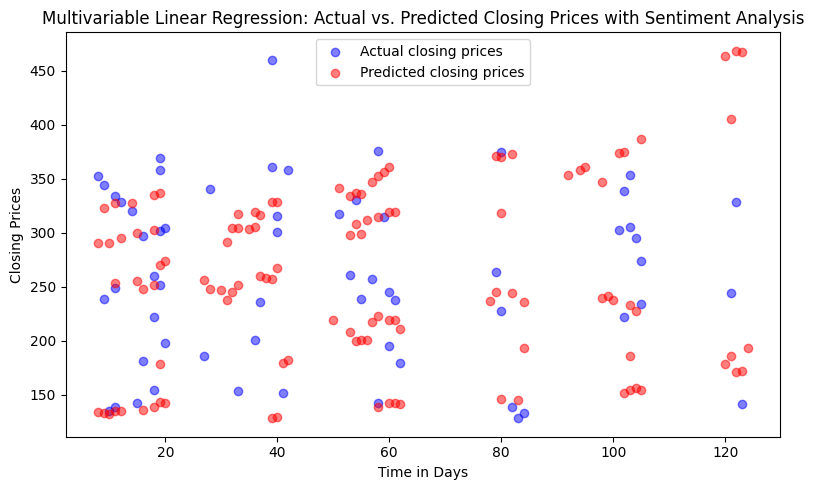

In [ ]:
# Ensure 'Actual' values are included in the DataFrame for plotting
X_test_multi['Actual'] = y_test_multi.reset_index(drop=True)  # Reset index to ensure alignment if necessary

# Add 'Predicted' values to the DataFrame
X_test_multi['Predicted'] = multivariable_predictions_sentiment

# Now plotting
plt.figure(figsize=(8, 5))

# Creating scatter plots for actual and predicted values for the entire dataset
plt.scatter(X_test_multi['Day'], X_test_multi['Actual'], color='blue', alpha=0.5, label='Actual closing prices')
plt.scatter(X_test_multi['Day'], X_test_multi['Predicted'], color='red', alpha=0.5, label='Predicted closing prices')

plt.title('Multivariable Linear Regression: Actual vs. Predicted Closing Prices with Sentiment Analysis')
plt.xlabel('Time in Days')
plt.ylabel('Closing Prices')
plt.legend()
plt.tight_layout()
plt.show()

**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Feature Selection for Random Forest Regression
X_rf = news_yahoo_data[['Open', 'High', 'Low', 'Volume', 'Day', 'Sentiment']]
y_rf = news_yahoo_data['Close']

# Splitting the data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.35, random_state=42)

# Model Initialization and Training
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_rf, y_train_rf)

# Predictions
randomforest_predictions_sentiment = random_forest_model.predict(X_test_rf)

# Evaluation
randomforest_mse_sentiment = mean_squared_error(y_test_rf, randomforest_predictions_sentiment)
print(f'Random Forest Regression MSE: {randomforest_mse_sentiment}')

Random Forest Regression MSE: 13.425193631516159


Plot a chart to visualize the Actual price vs Predicted price by the Random Forest model

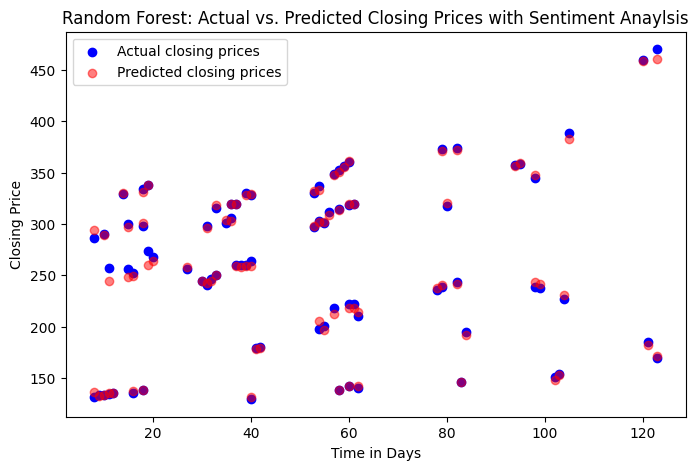

In [ ]:
# X_test has all the columns selected as features in our test data
# y_test has the actual closing prices and the predicted closing prices

# Plot the chart
plt.figure(figsize=(8, 5))

# Plot actual closing prices
plt.scatter(X_test_rf['Day'], y_test_rf, color='blue', label='Actual closing prices')

# Plot predicted closing prices
plt.scatter(X_test_rf['Day'], randomforest_predictions_sentiment, color='red', label='Predicted closing prices', alpha=0.5)

# Add labels
plt.title('Random Forest: Actual vs. Predicted Closing Prices with Sentiment Anaylsis')
plt.xlabel('Time in Days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

###Deep Learning - Long Short Term Memory

Long Short-Term Memory is an improved version of recurrent neural network designed by Hochreiter & Schmidhuber. LSTM is well-suited for sequence prediction tasks and excels in capturing long-term dependencies. Its applications extend to tasks involving time series and sequences. LSTM's strength lies in its ability to grasp the order dependence crucial for solving intricate problems, such as machine translation and speech recognition

Long Short-Term Memory (LSTM) is a type of artificial neural network that is often used in time series analysis. It can effectively predict stock market prices by handling data with multiple input and output timesteps



References:

https://www.geeksforgeeks.org/deep-learning-introduction-to-long-short-term-memory/

https://towardsdatascience.com/predicting-stock-prices-using-a-keras-lstm-model-4225457f0233

https://www.datacamp.com/tutorial/lstm-python-stock-market


**Data preparation and Normalization for LSTM Model**

In [ ]:
# Initialize scalers
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

# Separate features and target
features = news_yahoo_data[['Volume', 'Day', 'Open', 'Close', 'High', 'Low', 'Sentiment']].values
target = news_yahoo_data['Close'].values.reshape(-1, 1)

# Scale features and target separately
features_scaled = feature_scaler.fit_transform(features)
target_scaled = target_scaler.fit_transform(target)

# Function to create sequences
def create_sequences(features, target, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(features)):
        X.append(features[i-sequence_length:i])
        y.append(target[i, 0])
    return np.array(X), np.array(y)

sequence_length = 30
X, y = create_sequences(features_scaled, target_scaled, sequence_length)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Building the LSTM Model**

In [ ]:
# Function to create and compile LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Model Initialization
lstm_model = create_lstm_model((X_train.shape[1], X_train.shape[2]))

**Training the Model**

In [ ]:
# Train the model
history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
5/5 [==============================] - 6s 361ms/step - loss: 0.1462 - val_loss: 0.0305
Epoch 2/20
5/5 [==============================] - 0s 35ms/step - loss: 0.0550 - val_loss: 0.0377
Epoch 3/20
5/5 [==============================] - 0s 38ms/step - loss: 0.0306 - val_loss: 0.0297
Epoch 4/20
5/5 [==============================] - 0s 35ms/step - loss: 0.0272 - val_loss: 0.0343
Epoch 5/20
5/5 [==============================] - 0s 34ms/step - loss: 0.0264 - val_loss: 0.0291
Epoch 6/20
5/5 [==============================] - 0s 34ms/step - loss: 0.0207 - val_loss: 0.0303
Epoch 7/20
5/5 [==============================] - 0s 37ms/step - loss: 0.0205 - val_loss: 0.0290
Epoch 8/20
5/5 [==============================] - 0s 36ms/step - loss: 0.0173 - val_loss: 0.0284
Epoch 9/20
5/5 [==============================] - 0s 35ms/step - loss: 0.0179 - val_loss: 0.0286
Epoch 10/20
5/5 [==============================] - 0s 33ms/step - loss: 0.0169 - val_loss: 0.0305
Epoch 11/20
5/5 [===========

**Making Predictions and Evaluating the Model**

In [ ]:
# Making predictions
lstm_predictions = lstm_model.predict(X_test)

# Inverse transform predictions and y_test to compare actual values
predicted_prices = target_scaler.inverse_transform(lstm_predictions)
actual_prices = target_scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MSE
lstm_mse = mean_squared_error(actual_prices, predicted_prices)
print(f'LSTM MSE: {lstm_mse}')

2/2 [==============================] - 1s 10ms/step
LSTM MSE: 867.6152367656766


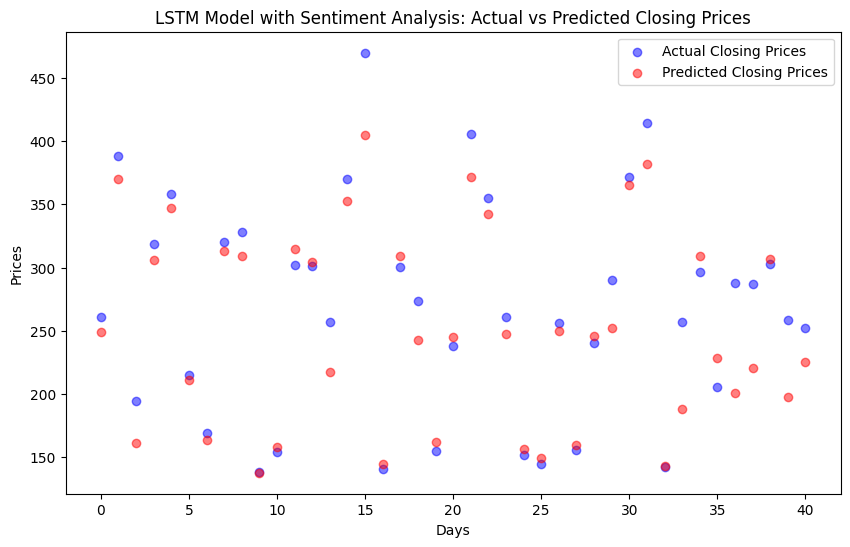

In [ ]:
# Get the range for the days
days = range(len(predicted_prices))
plt.figure(figsize=(10, 6))
plt.scatter(days, actual_prices, color='blue', label='Actual Closing Prices', alpha=0.5)
plt.scatter(days, predicted_prices, color='red', label='Predicted Closing Prices', alpha=0.5)
plt.title('LSTM Model with Sentiment Analysis: Actual vs Predicted Closing Prices')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()
plt.show()

###Enhance the LSTM Model

To enhance the LSTM model lets use MACD (Moving Average Convergence Divergence) as a feature, build bidirectional LSTM layer, and perform hyperparameter tuning.

References:

https://www.investopedia.com/trading/macd/

https://medium.com/@financial_python/building-a-macd-indicator-in-python-190b2a4c1777

https://medium.com/coinmonks/algorithmic-trading-with-macd-and-python-b709b8a46d84

https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html

https://www.geeksforgeeks.org/bidirectional-lstm-in-nlp/

https://www.analyticsvidhya.com/blog/2021/08/easy-hyperparameter-tuning-in-neural-networks-using-keras-tuner/

**Adding MACD Feature**

The Moving Average Convergence Divergence, commonly known as MACD, is a trend-following momentum indicator that helps traders identify potential trend reversals, momentum strength, and the overall direction of an stock's price.

In [ ]:
# Calculate the MACD feature for your dataset
def calculate_macd(data, short_window, long_window, signal):
    # Ensure calculations are only done on the 'Close' column
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal, adjust=False).mean()

    # Assign MACD and Signal Line back to the dataframe
    data['MACD'] = macd
    data['Signal_Line'] = signal_line
    return data

news_yahoo_data = calculate_macd(news_yahoo_data, short_window=12, long_window=26, signal=9)

**Data preparation with MACD**

In [ ]:
# Include MACD and Signal Line in the features
features = news_yahoo_data[['Volume', 'Day', 'Sentiment', 'MACD', 'Signal_Line']].values
target = news_yahoo_data['Close'].values.reshape(-1, 1)

# Scale features and target separately
features_scaled = feature_scaler.fit_transform(features)
target_scaled = target_scaler.fit_transform(target)

# Function to create sequences
def create_sequences(features, target, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(features)):
        X.append(features[i-sequence_length:i])
        y.append(target[i, 0])
    return np.array(X), np.array(y)

sequence_length = 30
X, y = create_sequences(features_scaled, target_scaled, sequence_length)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Building a Bidirectional LSTM Model**

Bidirectional LSTM or BiLSTM is a term used for a sequence model which contains two LSTM layers, one for processing input in the forward direction and the other for processing in the backward direction.

In [ ]:
from tensorflow.keras.layers import Bidirectional

# Function to create and compile a bidirectional LSTM model
def create_bidirectional_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(units=50)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Model Initialization
bidirectional_lstm_model = create_bidirectional_lstm_model((X_train.shape[1], X_train.shape[2]))

**Hyperparameter Tuning**

Hyperparameters are the values we provide to the model and are used to improve the performance of the model. They are not automatically learned during the training phase but have to be provided explicitly. Hyperparameter tuning helps in improving the model.

Perform hyperparameter tuning using libraries like keras-tuner and set up a search for the best hyperparameters

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.6 MB/s eta 0:00:00


In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from keras_tuner import HyperModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

class LSTMHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(Bidirectional(
            LSTM(
                units=hp.Int('units', min_value=32, max_value=512, step=32),
                return_sequences=True
            ),
            input_shape=self.input_shape
        ))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Bidirectional(
            LSTM(
                units=hp.Int('units', min_value=32, max_value=512, step=32)
            )
        ))
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
        model.add(Dense(units=1))
        model.compile(
            optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
            loss='mean_squared_error'
        )
        return model

# Instantiate the hypermodel
hypermodel = LSTMHyperModel(input_shape=(X_train.shape[1], X_train.shape[2]))

# Instantiate the tuner using RandomSearch
tuner = kt.RandomSearch(
    hypermodel,
    objective='val_loss',
    seed=42,
    max_trials=10,
    executions_per_trial=2,
    directory='tuner_results',
    project_name='lstm_hypermodel'
)

# Perform hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_split=0.1, verbose=1)
# Get the hyperparameters for each trial in a DataFrame
results_summary = tuner.results_summary()
# Access the trial data and extract hyperparameters
trials = tuner.oracle.get_best_trials(num_trials=10)

hyperparameters = [trial.hyperparameters.values for trial in trials]


Trial 10 Complete [00h 02m 54s]
val_loss: 0.02481305692344904

Best val_loss So Far: 0.024421404115855694
Total elapsed time: 00h 25m 08s
Results summary
Results in tuner_results/lstm_hypermodel
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 07 summary
Hyperparameters:
units: 480
dropout_1: 0.1
dropout_2: 0.0
learning_rate: 0.00036276965095376624
Score: 0.024421404115855694

Trial 02 summary
Hyperparameters:
units: 256
dropout_1: 0.1
dropout_2: 0.4
learning_rate: 0.001715074355925934
Score: 0.024484379217028618

Trial 04 summary
Hyperparameters:
units: 320
dropout_1: 0.1
dropout_2: 0.1
learning_rate: 0.0009749332269823054
Score: 0.024587414227426052

Trial 06 summary
Hyperparameters:
units: 64
dropout_1: 0.0
dropout_2: 0.30000000000000004
learning_rate: 0.0023360487671257027
Score: 0.024627000093460083

Trial 05 summary
Hyperparameters:
units: 480
dropout_1: 0.2
dropout_2: 0.2
learning_rate: 0.0006752863927347823
Score: 0.024744096212089062

Trial 09 summary


In [ ]:
# Convert the hyperparameters list to a DataFrame
df_hyperparameters = pd.DataFrame(hyperparameters)
df_hyperparameters

,units,dropout_1,dropout_2,learning_rate
0,480,0.1,0.0,0.000363
1,256,0.1,0.4,0.001715
2,320,0.1,0.1,0.000975
3,64,0.0,0.3,0.002336
4,480,0.2,0.2,0.000675
5,448,0.0,0.1,0.001028
6,352,0.0,0.2,0.000350
7,480,0.1,0.2,0.000136
8,480,0.0,0.4,0.000122
9,448,0.2,0.1,0.003965


**Retrieve and Evaluate best model**

In [ ]:
# Retrieve the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print or log the best hyperparameters as follows
print("Best Hyperparameters:")
print(f"Units: {best_hyperparameters.get('units')}")
print(f"Dropout 1: {best_hyperparameters.get('dropout_1')}")
print(f"Dropout 2: {best_hyperparameters.get('dropout_2')}")
print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")


Best Hyperparameters:
Units: 480
Dropout 1: 0.1
Dropout 2: 0.0
Learning Rate: 0.00036276965095376624


In [ ]:
# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model.
loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

2/2 [==============================] - 6s 262ms/step - loss: 0.0142
Test Loss: 0.014228451997041702


**Make Predictions**

In [ ]:
# Making predictions with the best model
predictions = best_model.predict(X_test)

# For a regression task these predictions are direct values
print(predictions)

2/2 [==============================] - 4s 208ms/step
[[ 0.30009905]
 [ 0.57494193]
 [ 0.11677185]
 [ 0.49875697]
 [ 0.6381449 ]
 [ 0.20669615]
 [ 0.222132  ]
 [ 0.6029417 ]
 [ 0.49515483]
 [-0.01116329]
 [ 0.18464495]
 [ 0.5309933 ]
 [ 0.56487924]
 [ 0.23981461]
 [ 0.64880407]
 [ 0.6925052 ]
 [ 0.00468775]
 [ 0.5224512 ]
 [ 0.29157498]
 [ 0.21401027]
 [ 0.28927916]
 [ 0.5789689 ]
 [ 0.64070064]
 [ 0.32435587]
 [ 0.16745448]
 [ 0.04271786]
 [ 0.28772765]
 [ 0.20339546]
 [ 0.2982686 ]
 [ 0.3290945 ]
 [ 0.5634728 ]
 [ 0.6018848 ]
 [ 0.00159682]
 [ 0.24399187]
 [ 0.5063127 ]
 [ 0.2945322 ]
 [ 0.23792304]
 [ 0.2802375 ]
 [ 0.53395355]
 [ 0.23345909]
 [ 0.24473101]]


Calculate MSE for the LSTM Model after applying MACD and Hyperparamter tuning.

In [ ]:
mse = mean_squared_error(y_test, predictions)
print(f"LSTM Mean Squared Error after applying MACD and hyperparameter tuning: {mse}")

LSTM Mean Squared Error after applying MACD and hyperparameter tuning: 0.014228450035964088


Compare the Actual vs. Predicted closing prices using LSTM

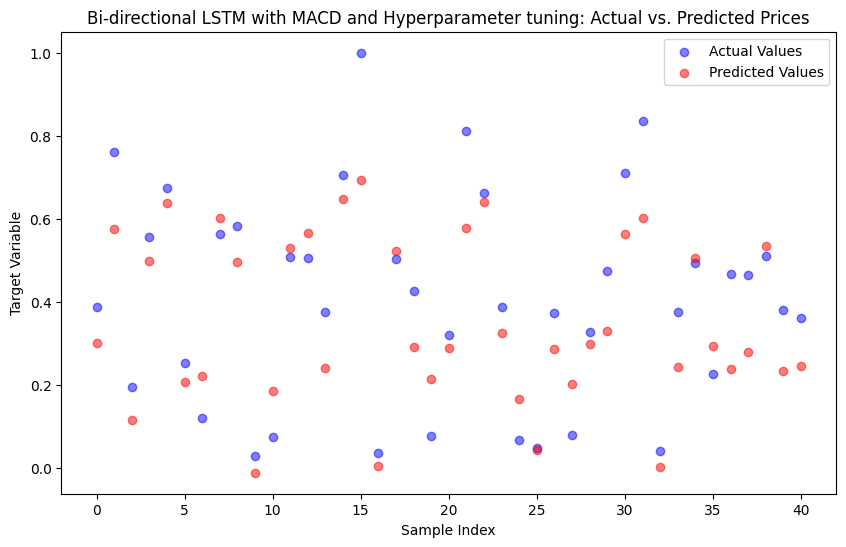

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values', alpha=0.5)
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted Values', alpha=0.5)
plt.title('Bi-directional LSTM with MACD and Hyperparameter tuning: Actual vs. Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()